In [1]:
!git clone https://github.com/OfTheByteQuest/Data-Analytics-Learning-and-Projects.git

%cd Data-Analytics-Learning-and-Projects

Cloning into 'Data-Analytics-Learning-and-Projects'...
remote: Enumerating objects: 192, done.
remote: Counting objects: 100% (192/192), done.
remote: Compressing objects: 100% (143/143), done.
remote: Total 192 (delta 54), reused 158 (delta 36), pack-reused 0 (from 0)
Receiving objects: 100% (192/192), 4.67 MiB | 8.31 MiB/s, done.
Resolving deltas: 100% (54/54), done.
/content/Data-Analytics-Learning-and-Projects


In [2]:
# Configuration for git commands

import os
from google.colab import userdata

os.environ['EMAIL'] = userdata.get('EMAIL')
os.environ['USERNAME'] = userdata.get('GITHUB_USERNAME')
os.environ['TOKEN'] = userdata.get('GITHUB_TOKEN')

!git config --global user.email os.envrion['EMAIL']
!git config --global user.name os.environ['USERNAME']

In [3]:
# Importing mandatory lib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Setting ouput format for plots

from matplotlib_inline.backend_inline import set_matplotlib_formats, select_figure_formats
from IPython import get_ipython

set_matplotlib_formats('retina')
select_figure_formats(shell=get_ipython(), formats="svg")

## Plotting with Seaborn and Customization Techniques

### Utilizing Seaborn for advanced plotting

In [5]:
import seaborn as sns

In [7]:
fb = pd.read_csv(
    filepath_or_buffer = "/content/Data-Analytics-Learning-and-Projects/Chapter-6/Data/fb_stock_prices_2018.csv",
    index_col = "date",
    parse_dates = True
)

quakes = pd.read_csv(
    filepath_or_buffer = "/content/Data-Analytics-Learning-and-Projects/Chapter-6/Data/earthquakes.csv",
)

#### Categorical Data

In [9]:
quakes.head()

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California


In [10]:
fb.head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726


<Axes: xlabel='magType', ylabel='mag'>

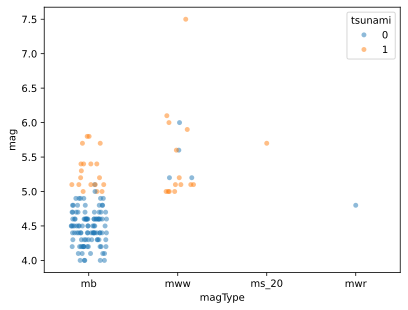

In [21]:
sns.stripplot(
    x='magType',
    y='mag',
    hue = 'tsunami',
    data = quakes.query('parsed_place == "Indonesia"'),
    jitter=0.2,
    alpha=0.5
)

<Axes: xlabel='magType', ylabel='mag'>

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


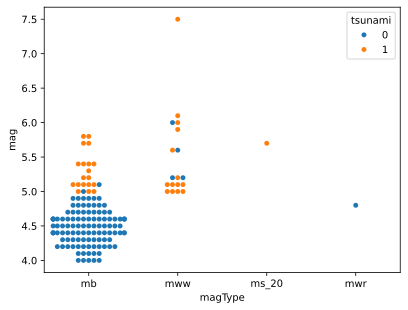

In [24]:
sns.swarmplot(
    x='magType',
    y = 'mag',
    data = quakes.query('parsed_place == "Indonesia"'),
    hue='tsunami',
    # dodge=True
)

#### Correlations and heatmaps

<Axes: >

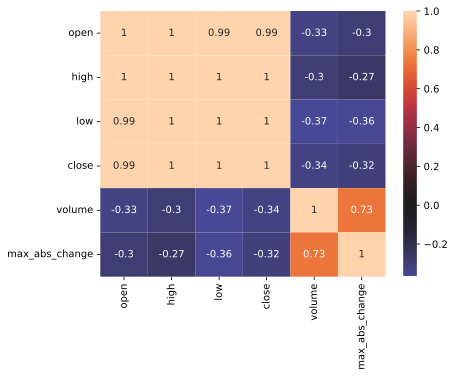

In [25]:
sns.heatmap(
    data = fb.sort_index().assign(
        volume = np.log(fb.volume),
        max_abs_change = fb.high - fb.low
    ).corr(),
    annot = True,
    center = 0
)

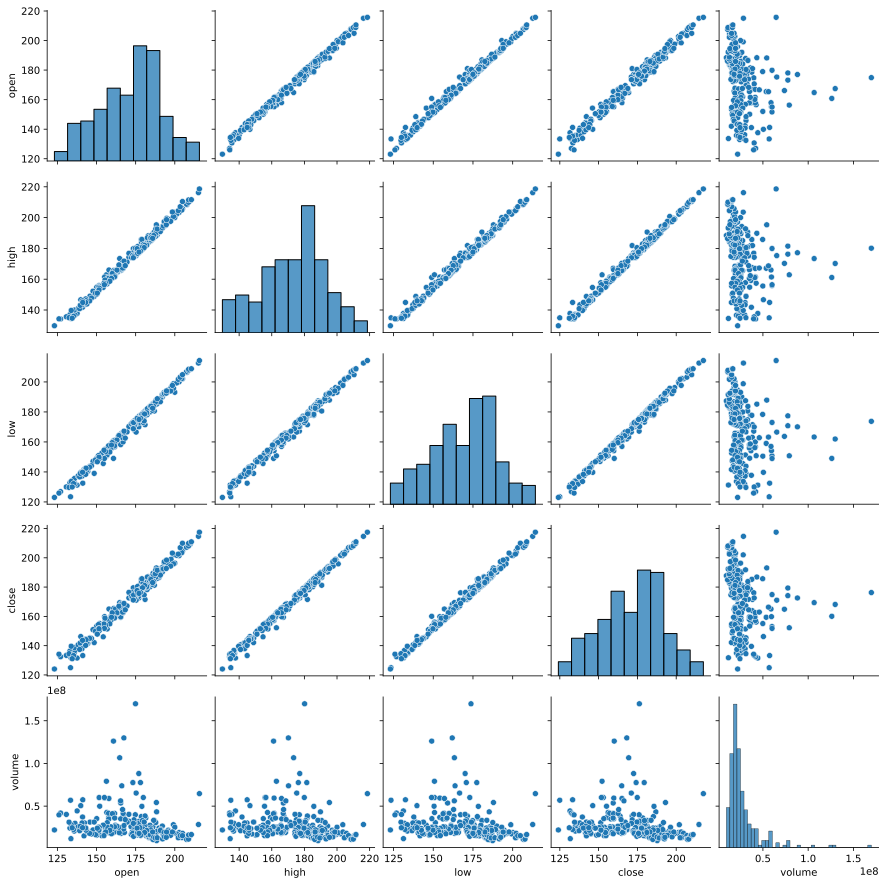

In [27]:
sns.pairplot(fb)

In [32]:
# sns.pairplot
# sns.husl_palette

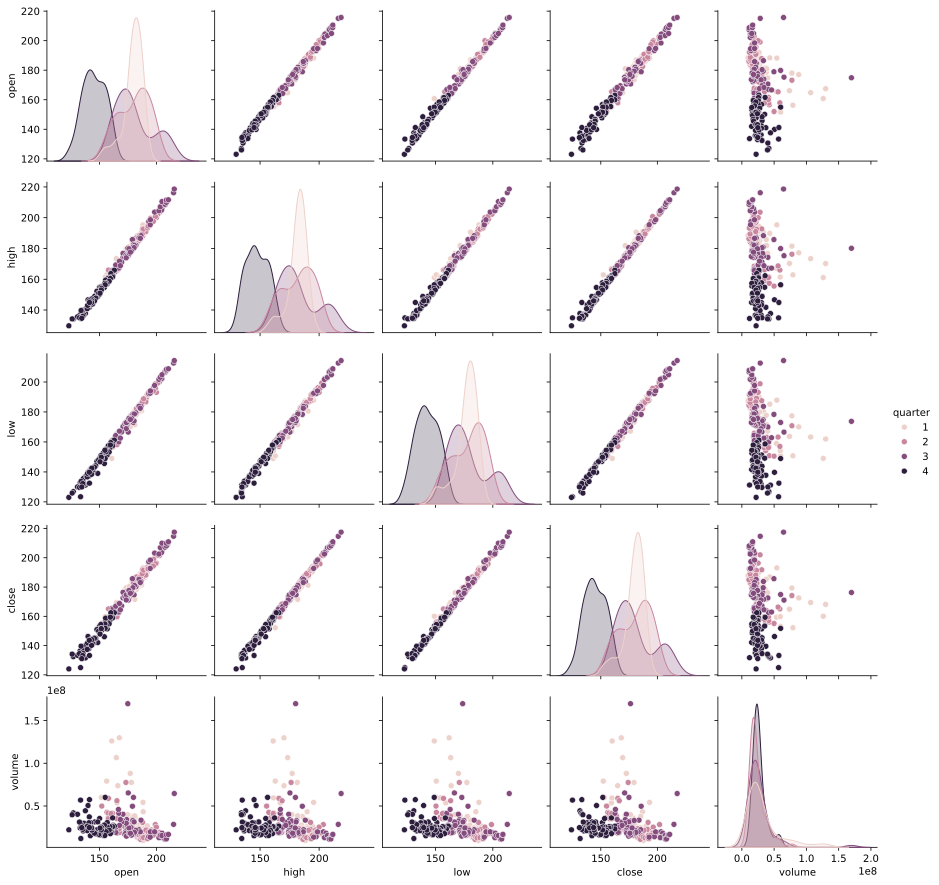

In [29]:
sns.pairplot(
    data=fb.assign(quarter = lambda x: x.index.quarter),
    diag_kind='kde',
    hue='quarter'
)

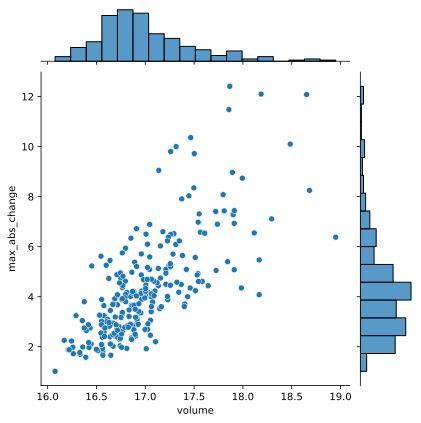

In [33]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    data = fb.assign(
        volume = np.log(fb.volume),
        max_abs_change = fb.high - fb.low
    )
)

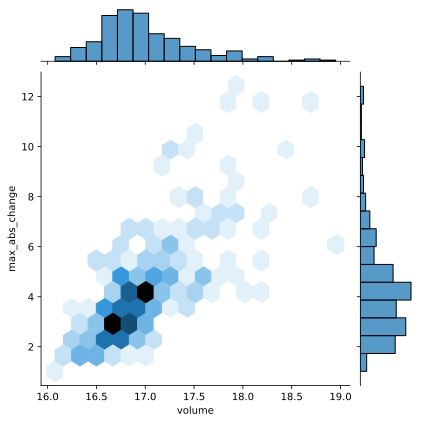

In [34]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    kind='hex',
    data = fb.assign(
        volume = np.log(fb.volume),
        max_abs_change = fb.high - fb.low
    )
)

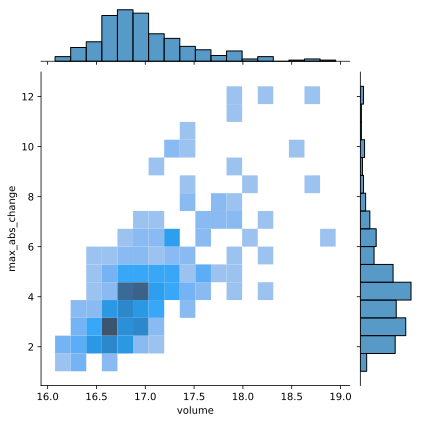

In [35]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    kind='hist',
    data = fb.assign(
        volume = np.log(fb.volume),
        max_abs_change = fb.high - fb.low
    )
)

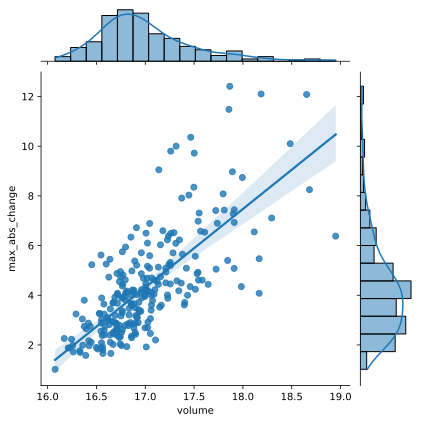

In [39]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    kind='reg',
    data = fb.assign(
        volume = np.log(fb.volume),
        max_abs_change = fb.high - fb.low
    )
)

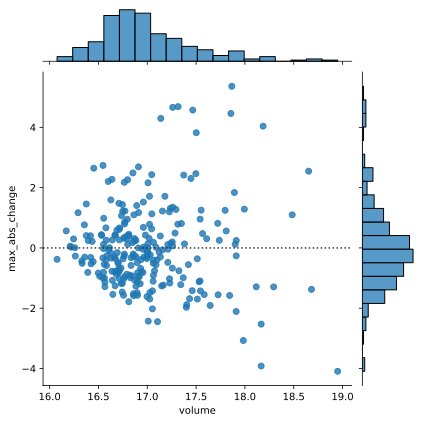

In [40]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    kind='resid',
    data = fb.assign(
        volume = np.log(fb.volume),
        max_abs_change = fb.high - fb.low
    )
)

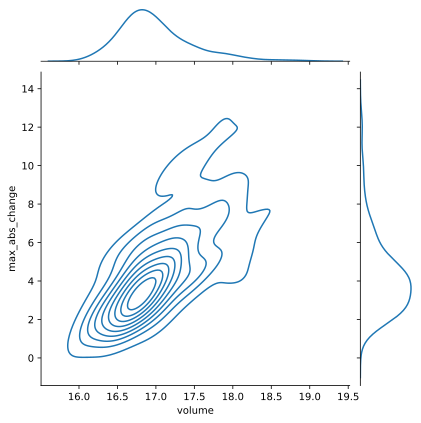

In [43]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    kind='kde',
    data = fb.assign(
        volume = np.log(fb.volume),
        max_abs_change = fb.high - fb.low
    )
)

#### Regression Plots

In [8]:
fb_reg_data = fb.assign(
    volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).iloc[:,-2:]

In [9]:
import itertools

###### Info on Iterators and Iterables

Iterables are objects that can be iterated over. When we start a loop, an iterator is created from the iterable. At each iteration, the iterator provides its next value, until it is exhausted; this means that once we complete a single iteration through all its items, there is nothing left, and it can't be reused. Iterators are iterables, but not all iterables are iterators. Iterables that aren't iterators can be used repeatedly. The iterators we get back when using itertools can only be used once through

In [12]:
iterator = itertools.repeat("I am an iterator", 1)

for i in iterator:
  print(f'-->{i}')

print('This printed once because the iterator is exhausted')

for i in iterator:
  print(f'-->{i}')

-->I am an iterator
This printed once because the iterator is exhausted


In [13]:
iterable = list(itertools.repeat("I am an iterable", 1))

for i in iterable:
  print(f'-->{i}')

print('This prints again because it\'s an iterbale:')

for i in iterable:
  print(f'-->{i}')

-->I am an iterable
This prints again because it's an iterbale:
-->I am an iterable


In [17]:
def reg_resid_plots(data):
  """
  Using seaborn, plot the regression and residuals plots
  side-by-side for every permutation of 2 columns in the data.

  Parameters:
        - data: A pandas DataFrame

  Returns:
        - A matplotlib Figure object.
  """

  num_cols = data.shape[1]
  permutation_count = num_cols * (num_cols - 1)

  fig, ax = plt.subplots(permutation_count, 2, figsize=(15, 8))

  for (x, y), axes, color in zip(
      itertools.permutations(data.columns, 2),
      ax,
      itertools.cycle(['royalblue','darkorange'])
  ):
      for subplot, func in zip(axes, (sns.regplot, sns.residplot)):
        func(x=x, y=y, data=data, ax=subplot, color=color)
  plt.close()
  return fig

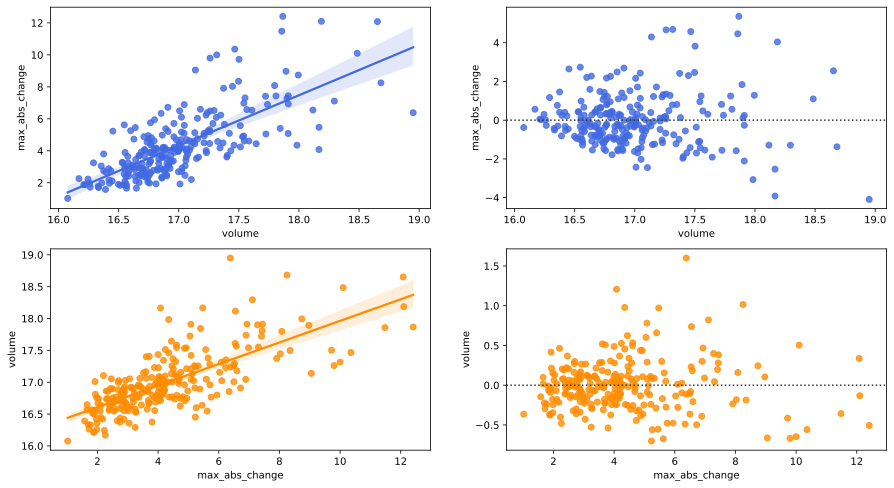

In [18]:
reg_resid_plots(fb_reg_data)

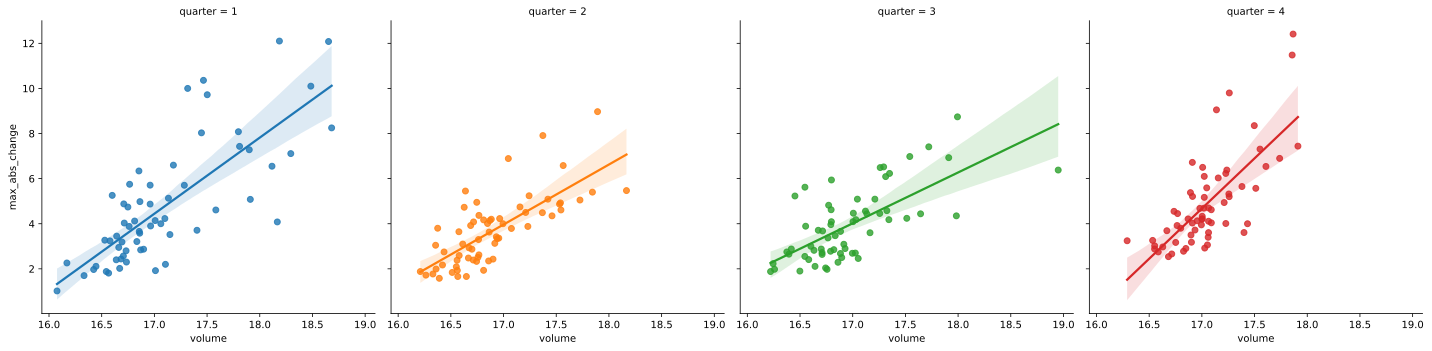

In [19]:
sns.lmplot(
    x='volume',
    y='max_abs_change',
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low,
        quarter=lambda x: x.index.quarter
    ),
    col='quarter',
    hue='quarter'
)

#### Distributions